In [135]:
from lz import *
from metadata import *
from gen_imglst import * 
import lz
import tensorflow as tf

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
# prefix='/mnt/nfs1703/kchen/imagenet-raw'

# leaves = {}
# for node in os.listdir(prefix):
#     if node.startswith('n'):
#         leaves[node] = len(os.listdir(prefix + '/' + node))

# mypickle(leaves,'nimgs.pkl')

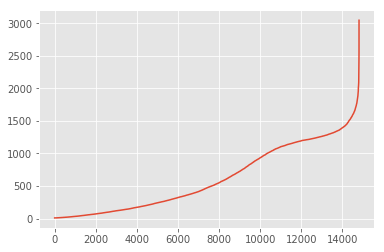

In [140]:
name2nimg=unpickle('nimgs.pkl')
name2nimg={name:nimg for name,nimg in name2nimg.items() if nimg>=10}

nimgs=list(name2nimg.values())
names=list(name2nimg.keys())
names,nimgs=cosort(names,nimgs,True)
# name2nimg={name:nimg for name,nimg in name2nimg.items() if nimg>=10}

plt.plot(nimgs)

In [144]:
def bsearch(nums,query):
    nums=np.asarray(nums)
    small=nums<query
    res=np.arange(nums.shape[0])[small].max()
    return res
bsearch(nimgs,500)
ind1200=bsearch(nimgs,1200)
ind1300=bsearch(nimgs,1300)
indt=nimgs.shape[0]
interval=np.diff([0,ind1200,ind1300,indt])
interval

7632

array([12042,  1333,  1440])

In [80]:
import random

def some(x, n):
    return x.loc[random.sample(set(x.index), n)]

show={id_: [id2word[id_],nimg_ ] for id_,nimg_ in zip(names[:7619],nimgs[:7619]) }
res=[]
for nimg_,df_ in  pd.DataFrame.from_dict(show, orient='index').groupby(1):
#     nimg_
    dft=some(df_,min(10,df_.index.shape[0]))
    res.append(dft)
show_df=pd.concat(res)    

show_df.to_excel('show.xlsx')

In [122]:
glob.glob('/home/wangxinglu/*.JPEG')

['/home/wangxinglu/n12076852_4867.JPEG',
 '/home/wangxinglu/n01961234_1104.JPEG',
 '/home/wangxinglu/n02697576_879.JPEG',
 '/home/wangxinglu/n12080820_1502.JPEG']

(118, 144, 3)

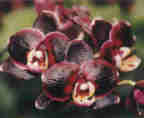

(326, 500, 3)

/home/wangxinglu/buf/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/wangxinglu/buf/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 655924 bytes but only got 65. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/wangxinglu/buf/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


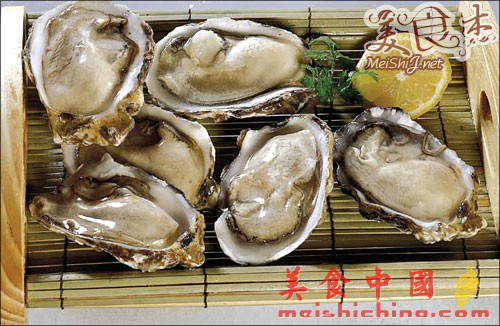

(480, 640, 3)

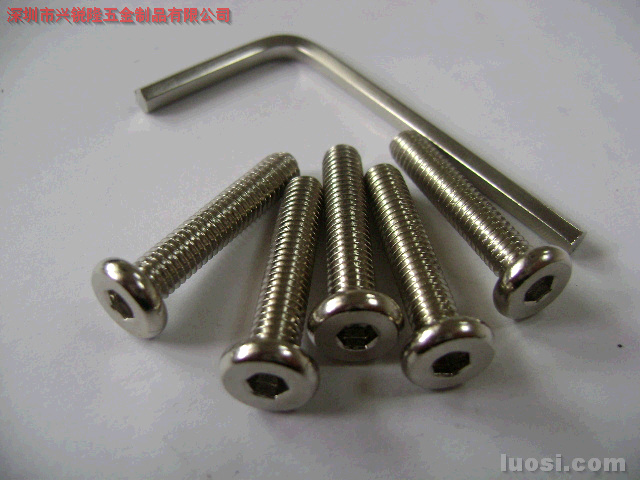

(233, 170, 3)

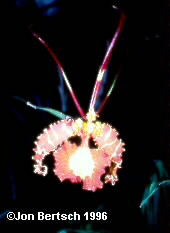

In [131]:
import cv2
from PIL import Image 
for path in glob.glob('/home/wangxinglu/*.JPEG'):
    im=cv2.imread(path,cv2.IMREAD_COLOR)    
    im.shape
    Image.open(path)     
